In [435]:
# Load the Breast Cancer Dataset

from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

x = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

display(x.head())

display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [436]:
# Check the data size

display(f'x shape: {x.shape}')
display(f'y shape: {y.shape}')

'x shape: (569, 30)'

'y shape: (569, 1)'

In [437]:
# Check the count of target values

display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


In [438]:
# Balance the target values

import pandas as pd

data = pd.concat([x,y],axis=1)

data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

data_B = data_B.sample(n=200,random_state=42)
data_M = data_M.sample(n=200,random_state=42)

balanced_data = pd.concat([data_B,data_M])

display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
B,200
M,200


In [439]:
# Separate features and target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

x = balanced_data.drop('Diagnosis',axis=1)
y = balanced_data['Diagnosis']

y = y.map({'B':0,'M':1})

display(x)
display(y)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


,Diagnosis
395,0
110,0
481,0
493,0
136,0
...,...
257,1
328,1
199,1
194,1


In [440]:
# Split into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Check training and testing shapes

display(f'x_train shape: {x_train.shape}')
display(f'x_test shape: {x_test.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'y_test shape: {y_test.shape}')

'x_train shape: (320, 30)'

'x_test shape: (80, 30)'

'y_train shape: (320,)'

'y_test shape: (80,)'

In [441]:
# Preprocess the data

from torch.utils.data import DataLoader, TensorDataset

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train,dtype=torch.float32)
x_test = torch.tensor(x_test,dtype=torch.float32)
y_train = torch.tensor(y_train.values,dtype=torch.long)
y_test = torch.tensor(y_test.values,dtype=torch.long)

train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

train_loader = DataLoader(train_dataset,batch_size=2,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=2,shuffle=False)

In [442]:
# Define the Neural Network Model

import torch.nn as nn

class ClassificationNet(nn.Module):
  def __init__(self,input_units,hidden_units,output_units):
    super(ClassificationNet,self).__init__()
    self.fc1 = nn.Linear(input_units,hidden_units)
    self.fc2 = nn.Linear(hidden_units,output_units)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = ClassificationNet(input_units=30,hidden_units=64,output_units=2)

In [443]:
# Check the summary of the model

print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [444]:
# Define loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [445]:
# Train the model on the training set and evaluate on the testing set

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for x_batch,y_batch in train_loader:
    optimizer.zero_grad()
    outputs=model(x_batch)
    loss=criterion(outputs,y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x_batch,y_batch in test_loader:
      test_outputs=model(x_batch)
      loss=criterion(test_outputs,y_batch)
      test_loss += loss.item()

  test_loss /= len(test_loader)
  test_losses.append(test_loss)

  # Print the training and test loss for each epoch

  print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.2881, Test Loss: 0.2115
Epoch [2/10], Train Loss: 0.1200, Test Loss: 0.1566
Epoch [3/10], Train Loss: 0.0913, Test Loss: 0.1344
Epoch [4/10], Train Loss: 0.0783, Test Loss: 0.1219
Epoch [5/10], Train Loss: 0.0709, Test Loss: 0.1161
Epoch [6/10], Train Loss: 0.0648, Test Loss: 0.1115
Epoch [7/10], Train Loss: 0.0590, Test Loss: 0.1059
Epoch [8/10], Train Loss: 0.0570, Test Loss: 0.1050
Epoch [9/10], Train Loss: 0.0519, Test Loss: 0.1043
Epoch [10/10], Train Loss: 0.0497, Test Loss: 0.1011


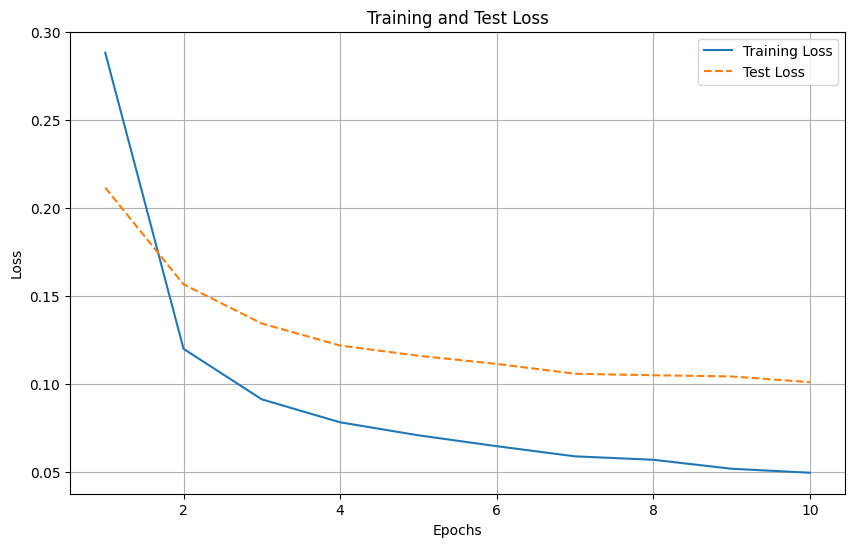

In [446]:
# Visualize training and test loss of the model

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.plot(range(1,epochs+1),train_losses,label='Training Loss')
plt.plot(range(1,epochs+1),test_losses,label='Test Loss',linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

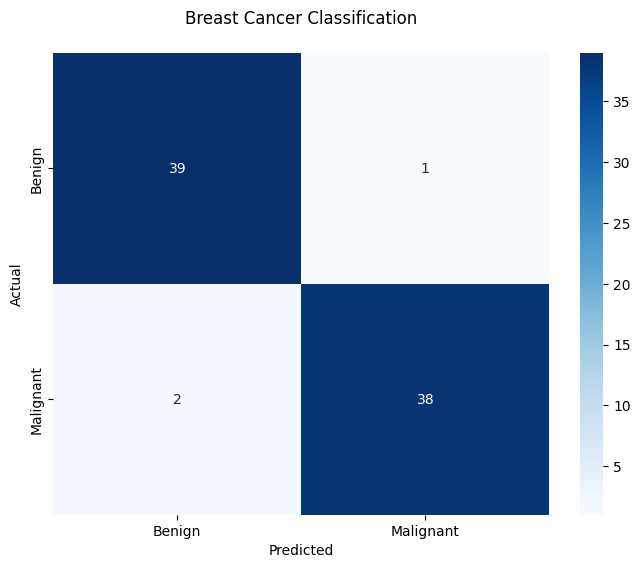

In [447]:
# Print the confusion matrix of the model

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model(x_test)
predicted_classes = torch.argmax(y_pred,dim=1)

y_test = y_test.numpy()
y_pred_classes = predicted_classes.numpy()

class_names = np.array(['Benign','Malignant'])

cm = confusion_matrix(y_test,y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Breast Cancer Classification\n')
plt.show()

In [448]:
# Print the classification report of the model

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.97      0.95      0.96        40

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



Epoch [1/10], Train Loss: 0.4202, Test Loss: 0.2767
Epoch [2/10], Train Loss: 0.1834, Test Loss: 0.1992
Epoch [3/10], Train Loss: 0.1358, Test Loss: 0.1698
Epoch [4/10], Train Loss: 0.1146, Test Loss: 0.1539
Epoch [5/10], Train Loss: 0.1019, Test Loss: 0.1432
Epoch [6/10], Train Loss: 0.0939, Test Loss: 0.1357
Epoch [7/10], Train Loss: 0.0879, Test Loss: 0.1306
Epoch [8/10], Train Loss: 0.0840, Test Loss: 0.1260
Epoch [9/10], Train Loss: 0.0799, Test Loss: 0.1228
Epoch [10/10], Train Loss: 0.0772, Test Loss: 0.1198


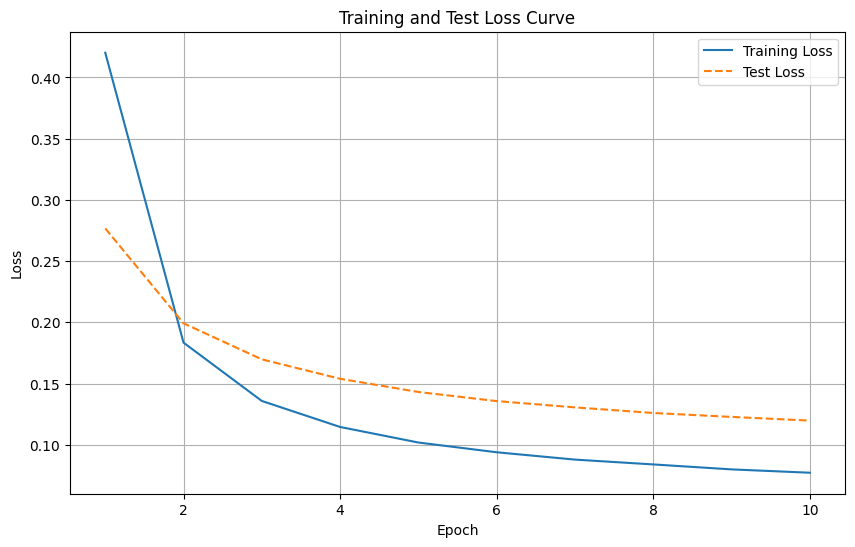

In [449]:
# Test the model with a new optimizer

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Visualize the training and test loss of the model with differnt optimizer


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Epoch [1/10], Train Loss: 0.3432, Test Loss: 0.2313
Epoch [2/10], Train Loss: 0.1499, Test Loss: 0.1625
Epoch [3/10], Train Loss: 0.1087, Test Loss: 0.1396
Epoch [4/10], Train Loss: 0.0921, Test Loss: 0.1201
Epoch [5/10], Train Loss: 0.0820, Test Loss: 0.1132
Epoch [6/10], Train Loss: 0.0744, Test Loss: 0.1092
Epoch [7/10], Train Loss: 0.0700, Test Loss: 0.1018
Epoch [8/10], Train Loss: 0.0665, Test Loss: 0.1005
Epoch [9/10], Train Loss: 0.0610, Test Loss: 0.1000
Epoch [10/10], Train Loss: 0.0583, Test Loss: 0.0959


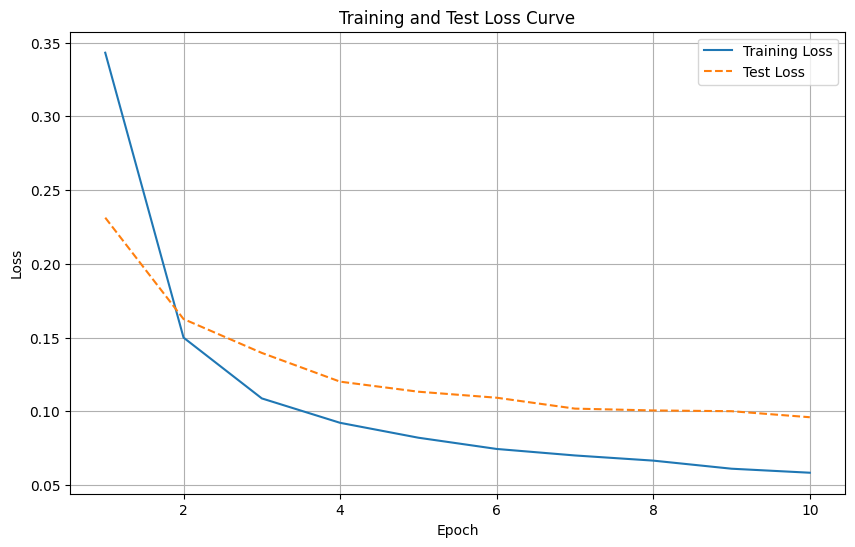

In [450]:
# Test the model with a different number of neurons

model_new = ClassificationNet(input_units=30, hidden_units=32, output_units=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Visualize the training and loss of the model with a differnt number of neurons

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [451]:
# Test the model on the Iris dataset

from sklearn.datasets import load_iris

iris = load_iris()

In [452]:
# Check the feature and target names of the Iris dataset

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [453]:
# Create an Iris dataframe

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

print(df_iris['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


In [454]:
# Separate features and targets

x_iris = df_iris.drop('species',axis=1)
y_iris = df_iris['species']

In [455]:
# Split into training and test sets then preprocess the data

x_train,x_test,y_train,y_test = train_test_split(x_iris,y_iris,test_size=0.2,random_state=42,stratify=y_iris)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train,dtype=torch.float32)
x_test = torch.tensor(x_test,dtype=torch.float32)
y_train = torch.tensor(y_train.values,dtype=torch.long)
y_test = torch.tensor(y_test.values,dtype=torch.long)

train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

train_loader = DataLoader(train_dataset,batch_size=2,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=2,shuffle=False)

In [456]:
# Create a new neual net model

class IrisNet(nn.Module):
  def __init__(self,hidden_units):
    super(IrisNet,self).__init__()
    self.fc1 = nn.Linear(4,hidden_units)
    self.fc2 = nn.Linear(hidden_units,3)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model_iris = IrisNet(hidden_units=32)

In [433]:
# Train the model on the Iris dataset

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_iris.parameters(),lr=0.001)

epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
  model_iris.train()
  running_loss=0.0
  for x_batch,y_batch in train_loader:
    optimizer.zero_grad()
    outputs=model_iris(x_batch)
    loss=criterion(outputs,y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  avg_train_loss = running_loss / len(train_loader)
  train_losses.append(avg_train_loss)

  model_iris.eval()
  test_loss=0.0
  with torch.no_grad():
    for x_batch,y_batch in test_loader:
      test_outputs=model_iris(x_batch)
      loss=criterion(test_outputs,y_batch)
      test_loss+=loss.item()

  avg_test_loss = test_loss / len(test_loader)
  test_losses.append(avg_test_loss)

  print(f'Epoch: {epoch}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

Epoch: 0/50, Train Loss: 1.0388, Test Loss: 0.8904
Epoch: 1/50, Train Loss: 0.7814, Test Loss: 0.6865
Epoch: 2/50, Train Loss: 0.5978, Test Loss: 0.5543
Epoch: 3/50, Train Loss: 0.4844, Test Loss: 0.4749
Epoch: 4/50, Train Loss: 0.4147, Test Loss: 0.4269
Epoch: 5/50, Train Loss: 0.3678, Test Loss: 0.3920
Epoch: 6/50, Train Loss: 0.3359, Test Loss: 0.3655
Epoch: 7/50, Train Loss: 0.3063, Test Loss: 0.3417
Epoch: 8/50, Train Loss: 0.2839, Test Loss: 0.3234
Epoch: 9/50, Train Loss: 0.2636, Test Loss: 0.3079
Epoch: 10/50, Train Loss: 0.2502, Test Loss: 0.2913
Epoch: 11/50, Train Loss: 0.2320, Test Loss: 0.2789
Epoch: 12/50, Train Loss: 0.2160, Test Loss: 0.2653
Epoch: 13/50, Train Loss: 0.2038, Test Loss: 0.2510
Epoch: 14/50, Train Loss: 0.1919, Test Loss: 0.2419
Epoch: 15/50, Train Loss: 0.1802, Test Loss: 0.2289
Epoch: 16/50, Train Loss: 0.1705, Test Loss: 0.2181
Epoch: 17/50, Train Loss: 0.1620, Test Loss: 0.2078
Epoch: 18/50, Train Loss: 0.1517, Test Loss: 0.2002
Epoch: 19/50, Train Lo

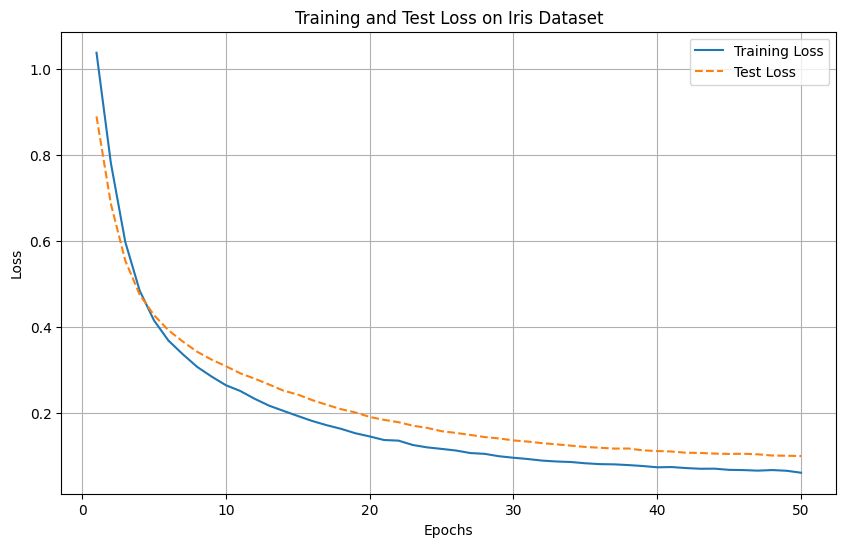

In [434]:
# Visualize the training and test loss of the model on the Iris dataset

plt.figure(figsize=(10,6))
plt.plot(range(1,epochs+1),train_losses,label='Training Loss')
plt.plot(range(1,epochs+1),test_losses,label='Test Loss',linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss on Iris Dataset')
plt.grid(True)
plt.legend()
plt.show()